In [60]:
import pandas as pd
import numpy as np
import sklearn as sk

In [61]:
df = pd.read_csv('tennis.txt', sep=' ')

In [82]:
from sklearn.preprocessing import LabelEncoder
def data2vec(df):
    lab = LabelEncoder()
    df['play'] = lab.fit_transform(df['play'])
    df['outlook'] = lab.fit_transform(df['outlook'])
    df['temp'] = lab.fit_transform(df['temp'])
    df['humid'] = lab.fit_transform(df['humid'])
    df['wind'] = lab.fit_transform(df['wind'])

In [83]:
data2vec(df)

In [92]:
from sklearn.model_selection import train_test_split
def splitdata(df):
    train, test = train_test_split(df, test_size=0.2, random_state=0)
    xtrain, ytrain = train.iloc[:,1:],train.iloc[:, :1]
    xtest, ytest = train.iloc[:,1:],train.iloc[:, :1]

In [93]:
splitdata(df)

In [68]:
from sklearn import tree

In [84]:
def CreateTree(xtrain,ytrain):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(xtrain, ytrain)

In [88]:
DT = CreateTree(xtrain,ytrain)

[Text(0.3333333333333333, 0.9166666666666666, 'X[0] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.75, 'X[1] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.4166666666666667, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.25, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

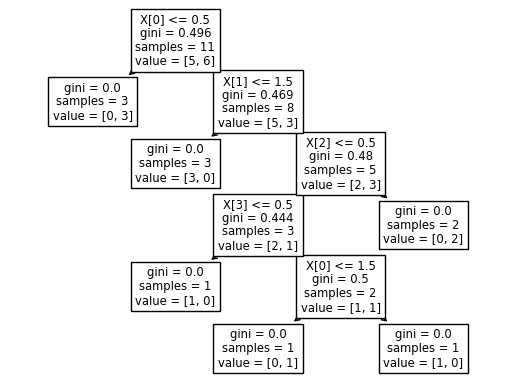

In [90]:
tree.plot_tree(clf)

In [81]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=['outlook','temp','humid','wind'])
print(r)

|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- temp <= 1.50
|   |   |--- class: 0
|   |--- temp >  1.50
|   |   |--- humid <= 0.50
|   |   |   |--- wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- wind >  0.50
|   |   |   |   |--- outlook <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- outlook >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- humid >  0.50
|   |   |   |--- class: 1

